# Predicting heart disease using maching learning

This notebook use various python-base maching learning and data science libraries to build a machine learning model
capable of predicting whether or not someone has heart disease base on their medical attributes.

Take following approach:
1. Problem definition
1. Data
1. Evaluation
1. Features
1. Modelling
1. Experimentation

## 1. Problem definition

In a statement.

> Given clinical parameters a patient, can we predict whether or not they have heart disease?

## 2. Data

Data source is available on Kaggle

[Data source and detail](https://www.kaggle.com/ronitf/heart-disease-uci)

## 3. Evaluation

Our goal

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease
during the proof of concept, we'll pursue the project.

## 4. Features

For detail about the data, refer to [here](https://www.kaggle.com/ronitf/heart-disease-uci)

For value description refer to [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

**Create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools

For data analysis and manipulation
* pandas
* numpy
* matplotlib

In [1]:
# Import all tools we need
# Regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make plot to appear inside notebook
%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('../data/heart-disease.csv')
df.shape #(row, columns)

(303, 14)

## Data exploration

1. What question are you trying to solve?
1. What kind of data do we have and how do we treat different types?
1. What's missing from the data how do you deal with it?
1. Where are the outliners and why should you care about them?
1. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

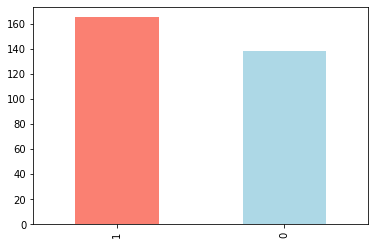

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease freqency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


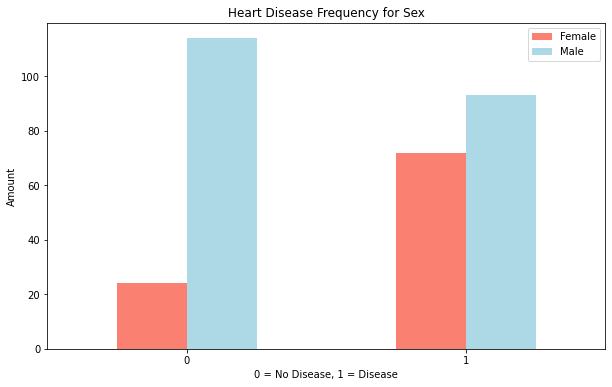

In [12]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount');
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max Heart Rate for Heart Disease

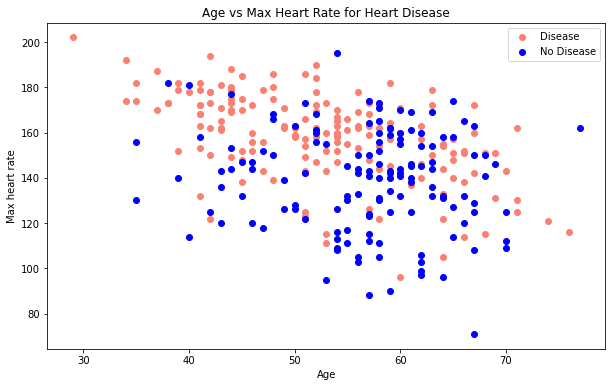

In [14]:
# create another figure
plt.figure(figsize=(10, 6))

# heart disease positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='salmon');

# heart disease negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='blue');

plt.title('Age vs Max Heart Rate for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max heart rate');
plt.legend(['Disease', 'No Disease']);


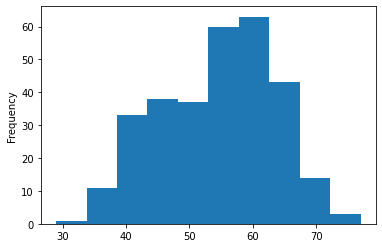

In [15]:
# check for distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


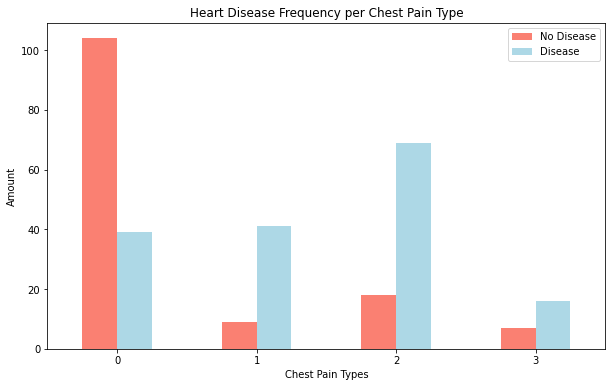

In [17]:
# make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Types')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

In [18]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


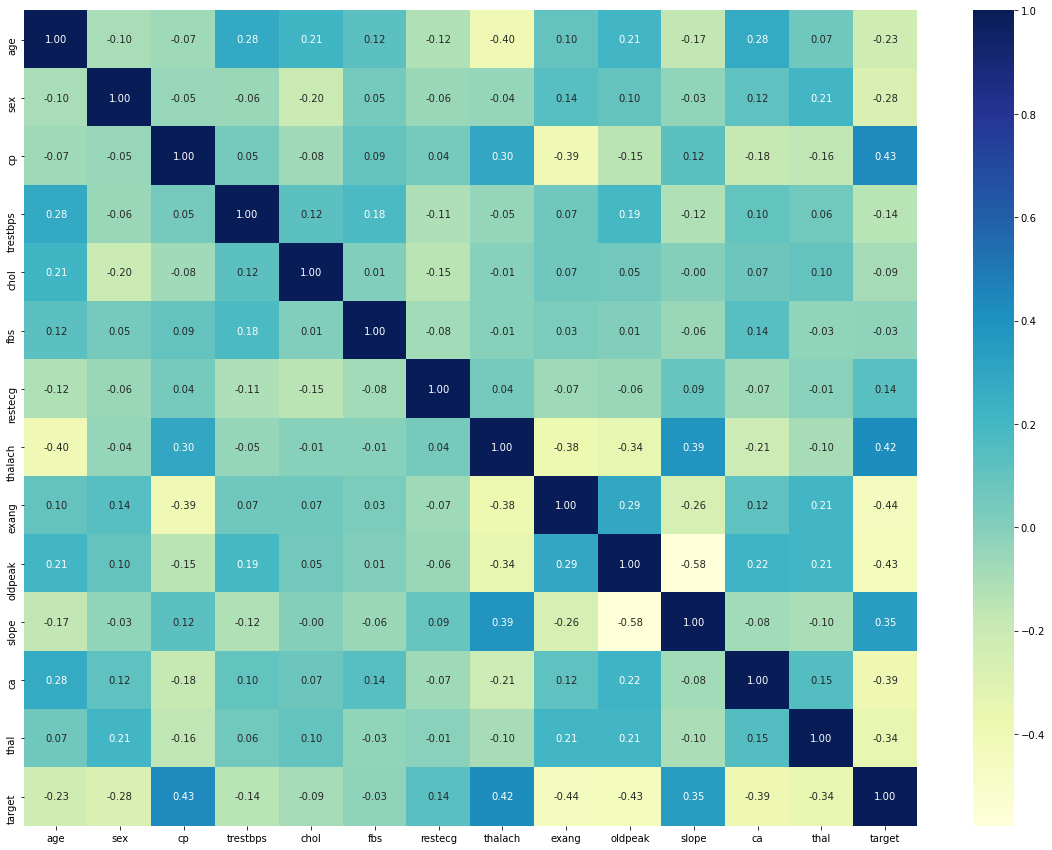

In [19]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

### What is Correlation Coefficient?

The correlation coefficient is a statistical measure of the strength of the relationship between
the relative movements of two variables. The value range between -1.0 and 1.0. 1.0 is positive 
correlation while -1.0 is negative correlation

* **positive correlation**: A relationship between two variables in which both variables move in tandem, in other words, 
one variable decrease as the other variable decrease, or one variable increase as the other variable increase.

* **negative correlation**: A relationship between two variables in which one variable increase as the other decrease, and vice versa.

[Reference](https://www.investopedia.com/terms/c/correlationcoefficient.asp#:~:text=The%20correlation%20coefficient%20is%20a,range%20between%20%2D1.0%20and%201.0.&text=A%20correlation%20of%20%2D1.0%20shows,shows%20a%20perfect%20positive%20correlation.)

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split data into x and y
x = df.drop('target', axis=1)
y = df['target']
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# split data into train and test sets
np.random.seed(42)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### build machine learning model

Models to try:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [26]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Creat a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    x_train: training data(no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test: test labels
    '''
    # set random seed
    np.random.seed(42)
    # make dictionary to keep model scores
    model_score = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(x_train, y_train)
        # evaluate the model and append its score to model_scores
        model_score[name] = model.score(x_test, y_test)
    
    return model_score

In [27]:
model_score = fit_and_score(models, x_train, x_test, y_train, y_test)
model_score

/Volumes/BOOTCAMP/MachineLearning/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Compare models

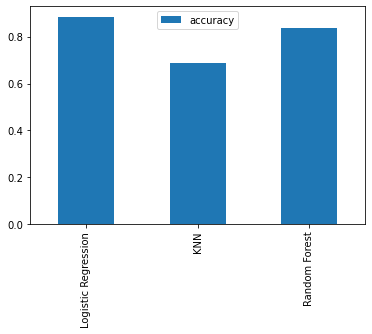

In [28]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar();

We have got baseline model, but baseline model's prediction is not meeting our expectation.
We need to do following:
* Hyperparamter tuning
* Feature importance
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

### Hyperparamter tuning by hand

In [29]:
# tuning KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit model into data
    knn.fit(x_train, y_train)
    
    # update train score
    train_scores.append(knn.score(x_train, y_train))
    
    #update test score
    test_scores.append(knn.score(x_test, y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


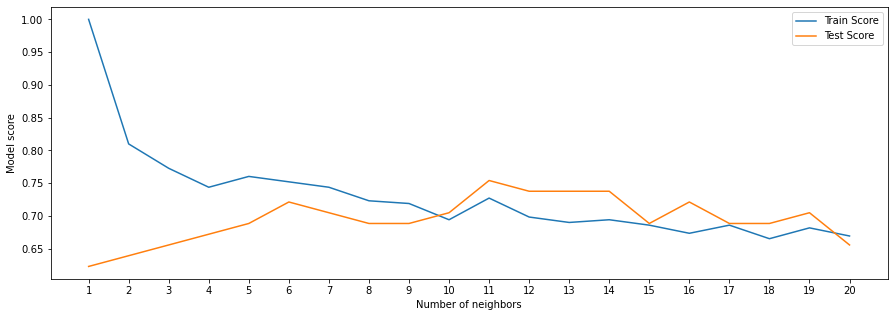

In [32]:
plt.figure(figsize=(15,5))
plt.plot(neighbors, train_scores, label='Train Score');
plt.plot(neighbors, test_scores, label='Test Score');
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## Hyperparamter tunning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [33]:
# Create a hyperparamter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

### Tunning LogisticRegression

In [34]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

### Tunning RandomForestClassifier

In [37]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter grid for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# Evaluate the randomized search model
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparamter tunning with GridSearchCV

In [40]:
# Different hyperparameters fro out LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# setup grid hyperparamter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid parameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuarcy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if corss-validation was used where possible.

In [43]:
# Make prediction s with tuned model
y_preds = gs_log_reg.predict(x_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

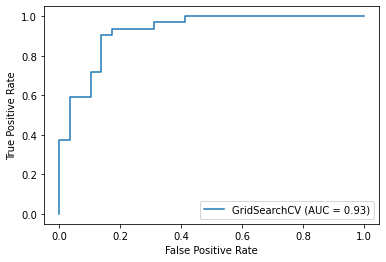

In [46]:
# Plot ROC curve and calculate and calculate AUC matric
plot_roc_curve(gs_log_reg, x_test, y_test);

In [47]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


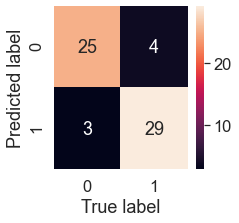

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    plots a nice looking confusion matrix using Seabor's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                    cbar=True)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve and AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [52]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [53]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [54]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [55]:
# Cross-validated f1
cv_f1 = cross_val_score(clf, x, y, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

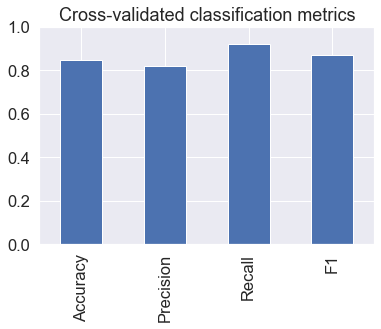

In [56]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend=False, ylim=[0.0, 1.0])

## Feature Important

Feature importance is another as asking, "Which feature contributed most to the outcomes of the model? and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME)feature importance"

Find feature importance for our LogisticRegression model...

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [60]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [61]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<AxesSubplot:title={'center':'Feature Importance'}>

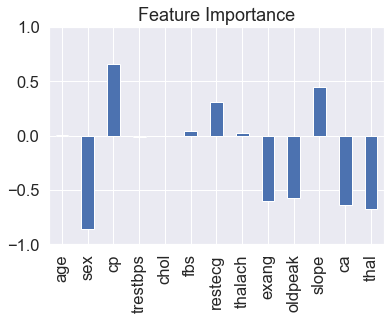

In [62]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False, ylim=[-1.0, 1.0])

### Sex coefficient to the target

In [63]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


* sex: (1 = male; 0 = female)
* target: (1 = heart disease; 0 = no heart disease)

### Slope coefficient to the target

In [64]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhearlthy heart

### Chest Pain coefficient to the target

In [65]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


chest pain type
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collection more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit evaluation metric). How would you export your model and share it with others